In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://drive.google.com/drive/folders/1EAqxx0Z7tjycnHTgwL8Tx3q4i5ngLHnm?usp=drive_link
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learnnig_Tahlildadeh"

Mounted at /content/drive


In [3]:
df = pd.read_csv(f'{data_path}/mnist_train.csv')
df.shape

(60000, 785)

In [4]:
# Tamrin 5
xt = df.iloc[:,1:].values
yt = df.iloc[:, 0].values

mt = pd.Series(yt)
print(mt.value_counts())

idx = list(df.iloc[:,1:].index)
np.random.shuffle(idx)
idx = idx[:25]

random_samples = xt[idx]
random_labels = yt[idx]

# random_indices = np.random.choice(xt.shape[0], size = 25, replace=False)
# random_samples = xt[random_indices]
# random_labels = yt[random_indices]



1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


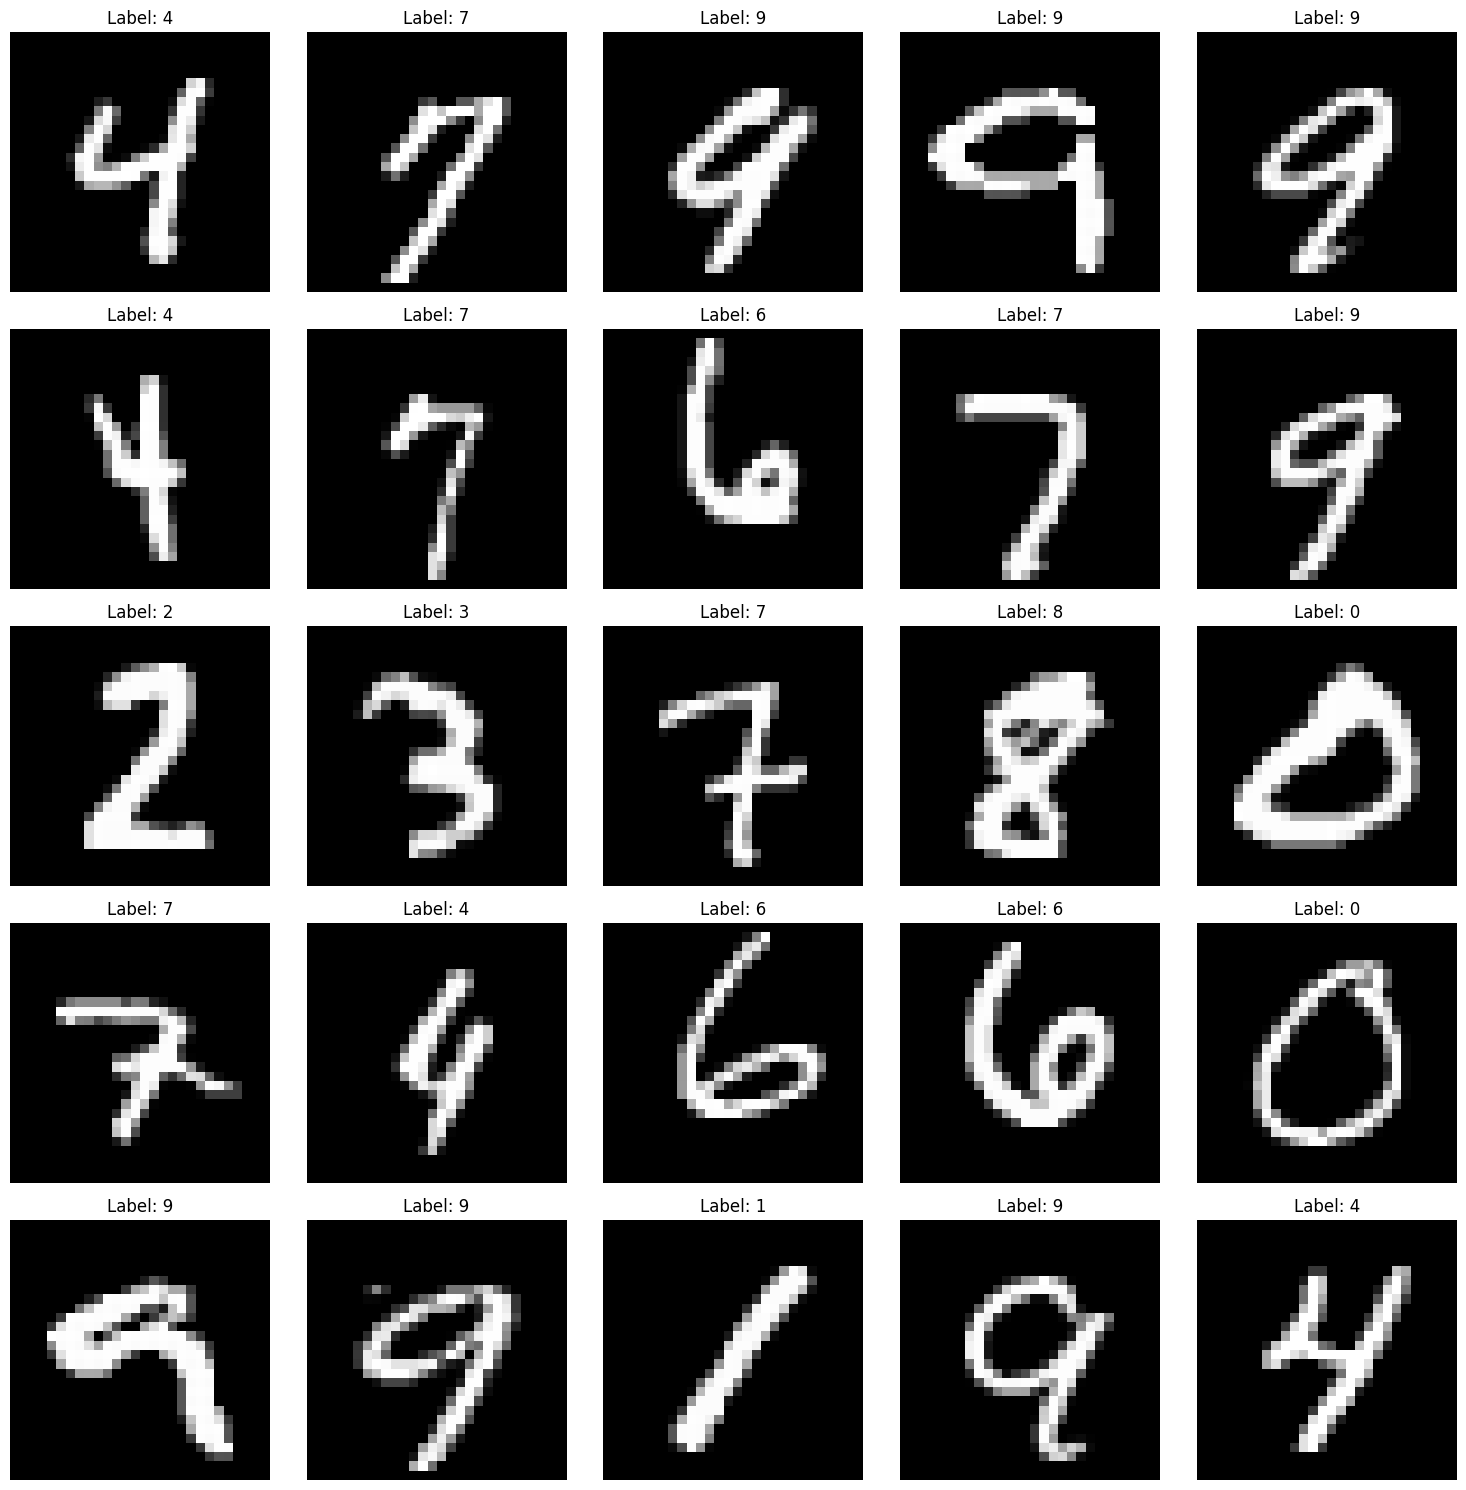

In [5]:
fig , axes = plt.subplots(nrows = 5, ncols = 5 , figsize = (15,15))
for i , ax in enumerate(axes.flat):
  sample = random_samples[i].reshape(28,28)
  ax.imshow(sample, cmap = 'gray')
  ax.set_title(f'Label: {random_labels[i]}')
  ax.axis('off')
plt.tight_layout()
plt.show()



In [6]:
#  Tamrin 6

In [7]:
cf = pd.read_csv(f'{data_path}/Manuscript_test.csv', header = None ) # nokte mohem , header ra hazf mikonad
cf.shape

(10, 785)

In [8]:
xm = cf.iloc[:,:-1].values
ym = cf.iloc[:,-1].values

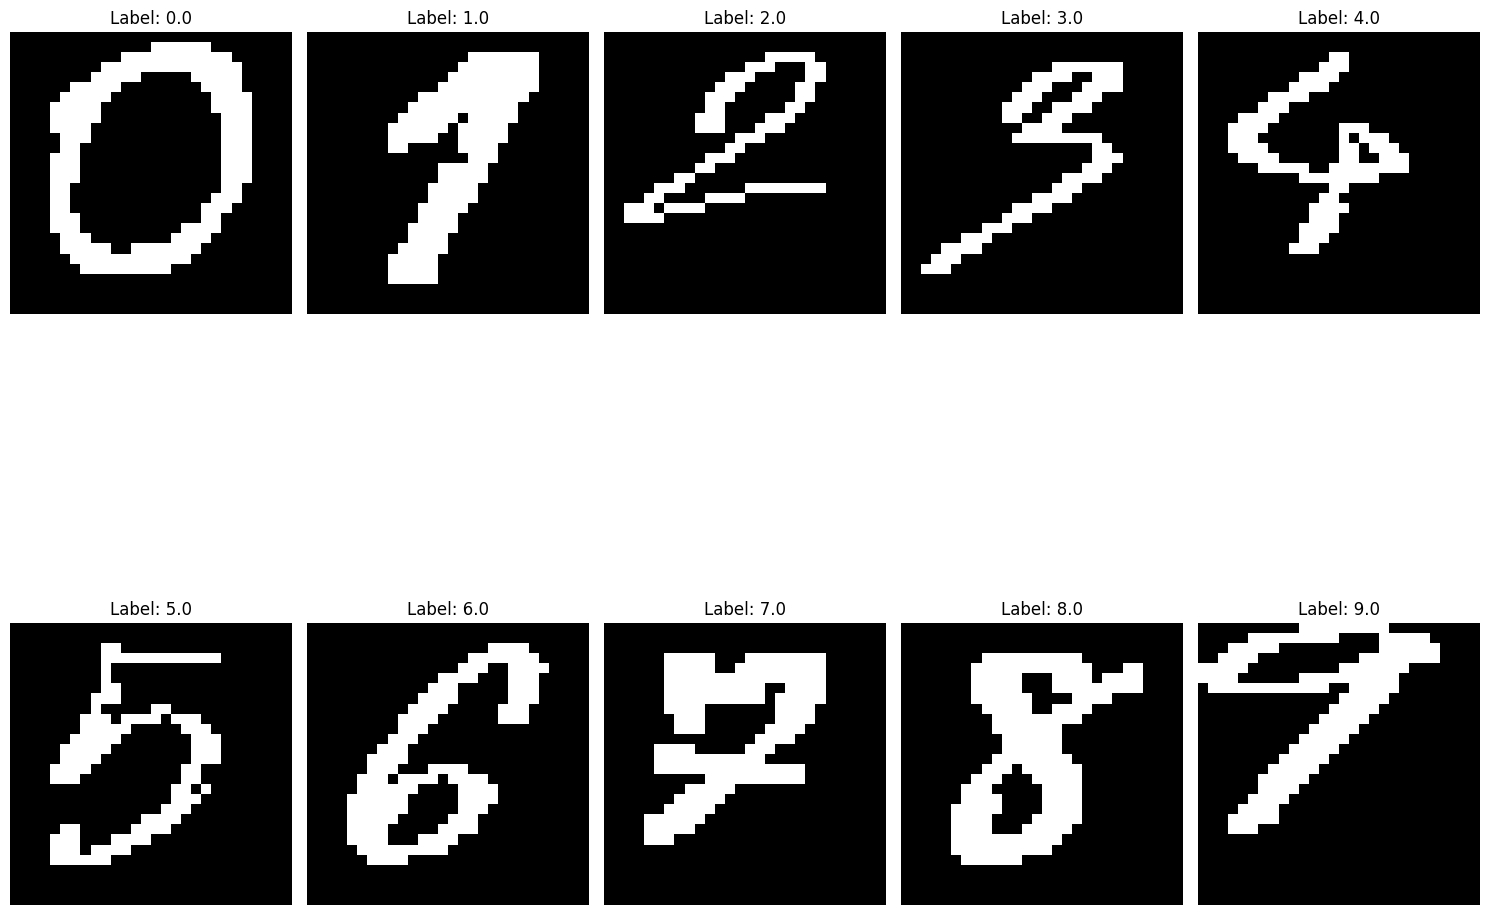

In [9]:
fig , axes = plt.subplots(nrows = 2, ncols = 5 , figsize = (15,15))
for i , ax in enumerate(axes.flat):
  sample = xm[i].reshape(28,28)
  ax.imshow(sample, cmap = 'gray')
  ax.set_title(f'Label: {ym[i]}')
  ax.axis('off')
plt.tight_layout()
plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size=0.2, stratify = yt, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [11]:
# Tamrin 8
ppn = Perceptron(random_state=2)
ppn.fit(x_train,y_train)

Perceptron(random_state=2)

In [12]:
y_pred = ppn.predict(x_test)

In [13]:
# Tamrin 9
percentage = sum(y_pred == y_test)/y_test.shape[0]
print(percentage)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.85825
0.85825


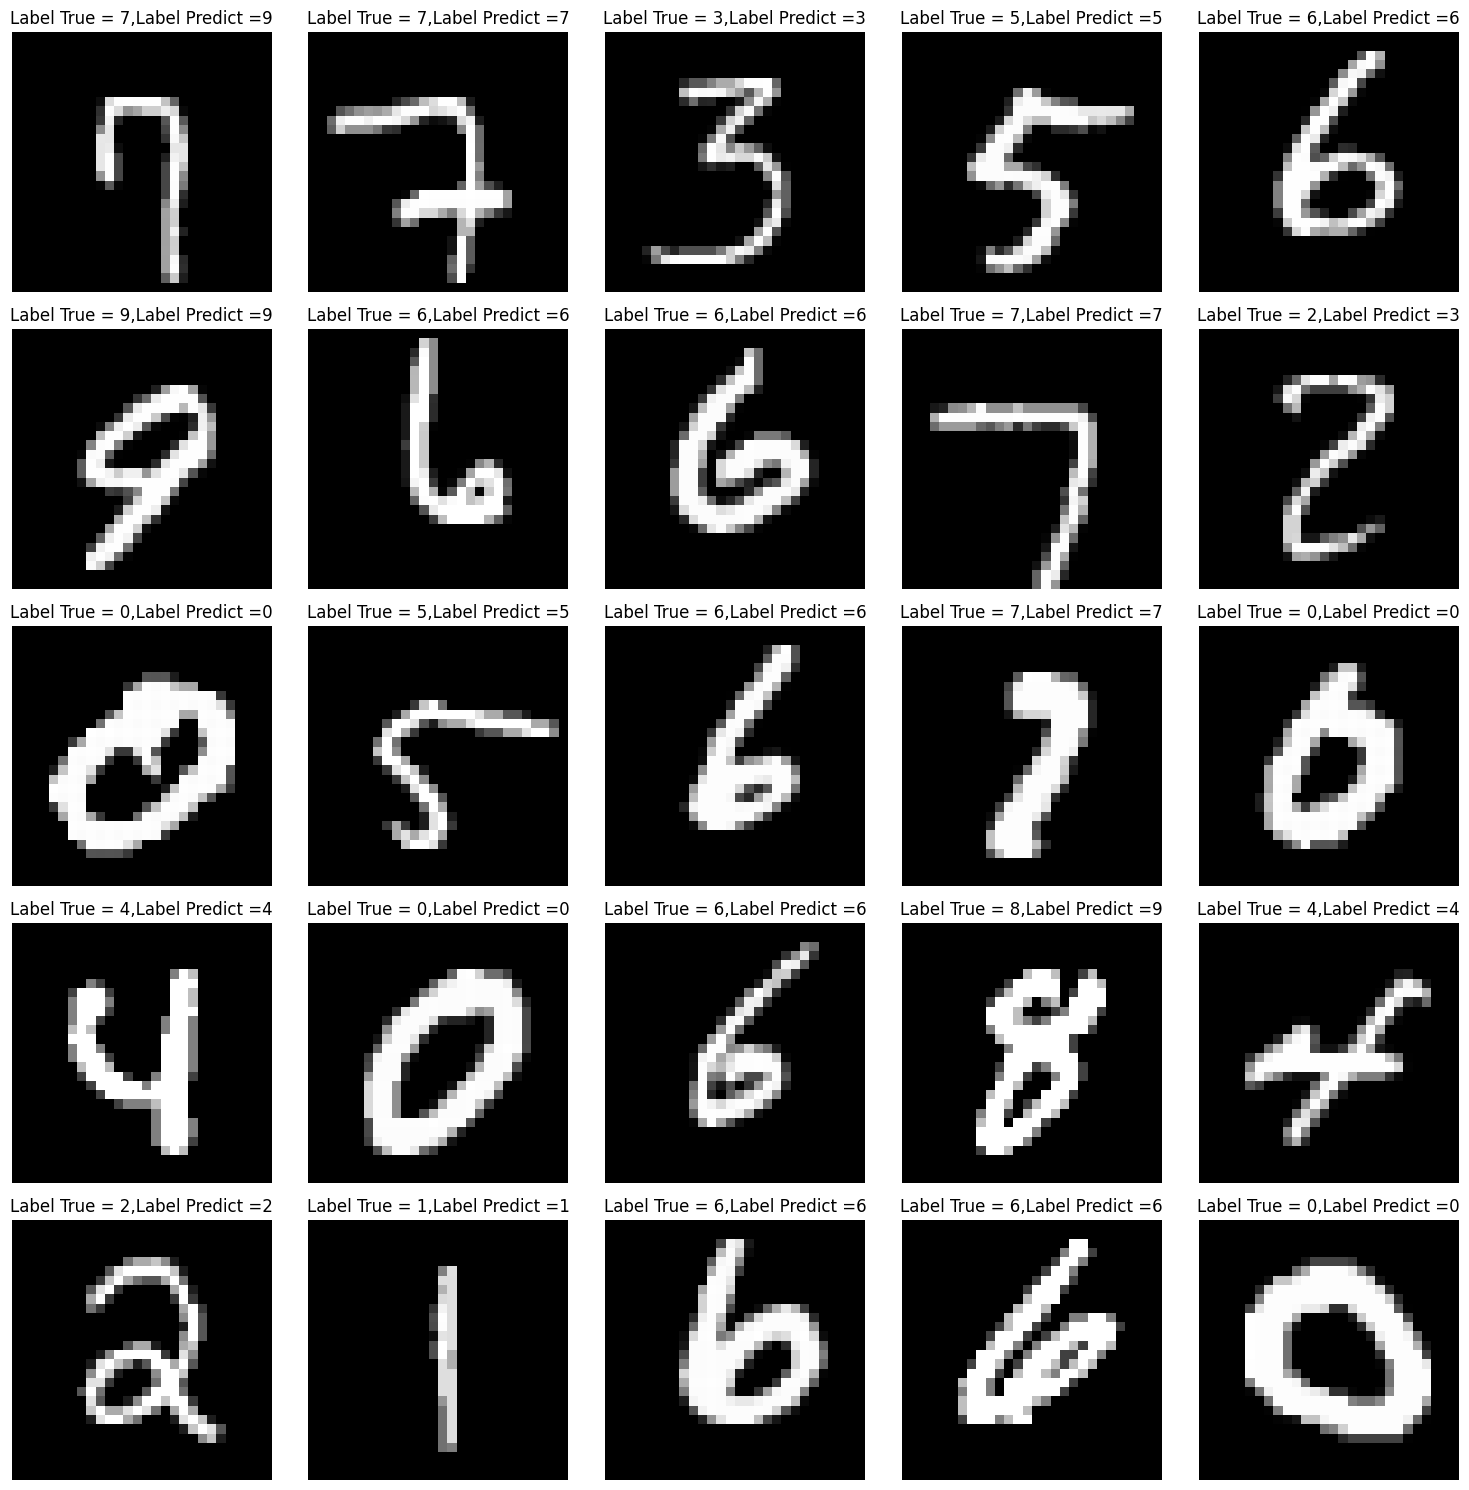

In [14]:
# Tamrin 10

fig , axes = plt.subplots(nrows = 5, ncols = 5 , figsize = (15,15))
for i , ax in enumerate(axes.flat):
  sample = x_test[i].reshape(28,28)
  ax.imshow(sample, cmap = 'gray')
  ax.set_title(f'Label True = {y_test[i]},Label Predict ={y_pred[i]}')
  ax.axis('off')
plt.tight_layout()
plt.show()



In [15]:
# Tamrin 11
ym_pred = ppn.predict(xm)

# Tamrin 9
percentage = sum(ym_pred == ym)/ym.shape[0]
print(percentage)


0.2


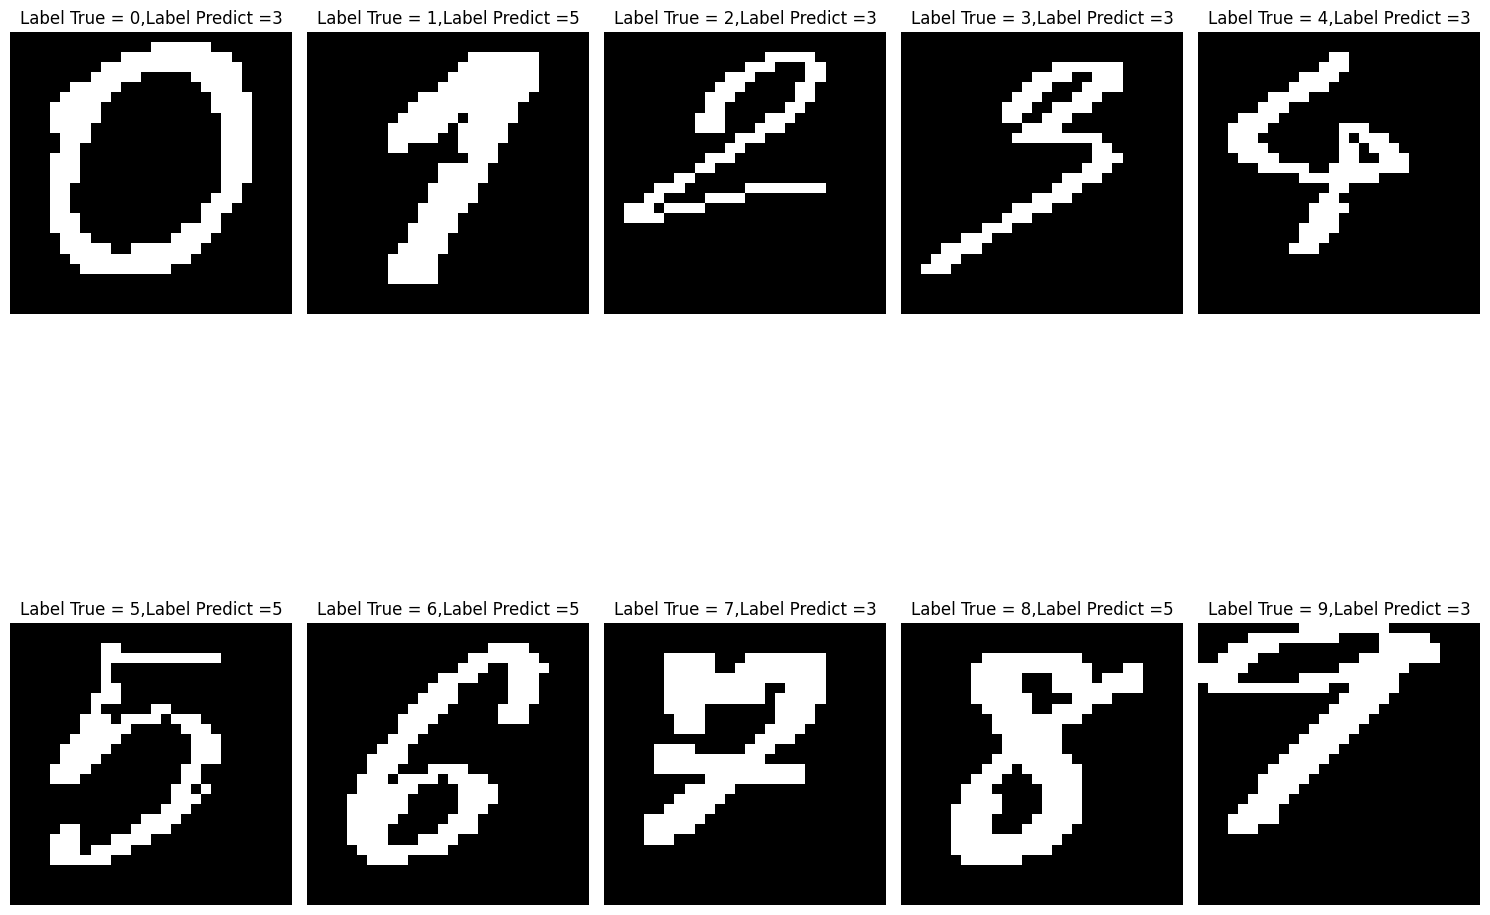

In [16]:
fig , axes = plt.subplots(nrows = 2, ncols = 5 , figsize = (15,15))
for i , ax in enumerate(axes.flat):
  sample = xm[i].reshape(28,28)
  ax.imshow(sample, cmap = 'gray')
  true_label = int(ym[i])
  pred_label = int(ym_pred[i])
  ax.set_title(f'Label True = {true_label},Label Predict ={pred_label}')
  ax.axis('off')
plt.tight_layout()
plt.show()